# Logistic Regression

Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

When we talk about Logistic Regression in general, we usually mean Binary logistic regression, although there are other types of Logistic Regression as well.

Logistic Regression can be divided into types based on the type of classification it does. With that in view, there are 3 types of Logistic Regression. Let’s talk about each of them:

### Binary Logistic Regression:

Binary Logistic Regression is the most commonly used type. It is the type we already discussed when defining Logistic Regression. In this type, the dependent/target variable has two distinct values, either 0 or 1, malignant or benign, passed or failed, admitted or not admitted.

### Multinomial Logistic Regression:

Multinomial Logistic Regression deals with cases when the target or independent variable has three or more possible values.

### Ordinal Logistic Regression

Ordinal Logistic Regression is used in cases when the target variable is of ordinal nature. In this type, the categories are ordered in a meaningful manner and each category has quantitative significance. Moreover, the target variable has more than two categories. For example, the grades obtained on an exam have categories that have quantitative significance and they are ordered. Keeping it simple, the grades can be A, B, or C.


### Binary Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55075 entries, 0 to 55074
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    499 non-null    float64
 1   V1      499 non-null    float64
 2   V2      499 non-null    float64
 3   V3      499 non-null    float64
 4   V4      499 non-null    float64
 5   V5      499 non-null    float64
 6   V6      499 non-null    float64
 7   V7      499 non-null    float64
 8   V8      499 non-null    float64
 9   V9      499 non-null    float64
 10  V10     499 non-null    float64
 11  V11     499 non-null    float64
 12  V12     499 non-null    float64
 13  V13     499 non-null    float64
 14  V14     499 non-null    float64
 15  V15     499 non-null    float64
 16  V16     499 non-null    float64
 17  V17     499 non-null    float64
 18  V18     499 non-null    float64
 19  V19     499 non-null    float64
 20  V20     499 non-null    float64
 21  V21     499 non-null    float64
 22

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
sum(df.duplicated())

54582

In [8]:
df.drop_duplicates(inplace=True)
df.drop('Time', axis=1, inplace=True)


In [9]:
X = df.iloc[:, df.columns != 'Class']
y = df.Class

In [23]:
y = y.dropna(how='any')
X = X.dropna(how='any')

In [24]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

Data Visualization

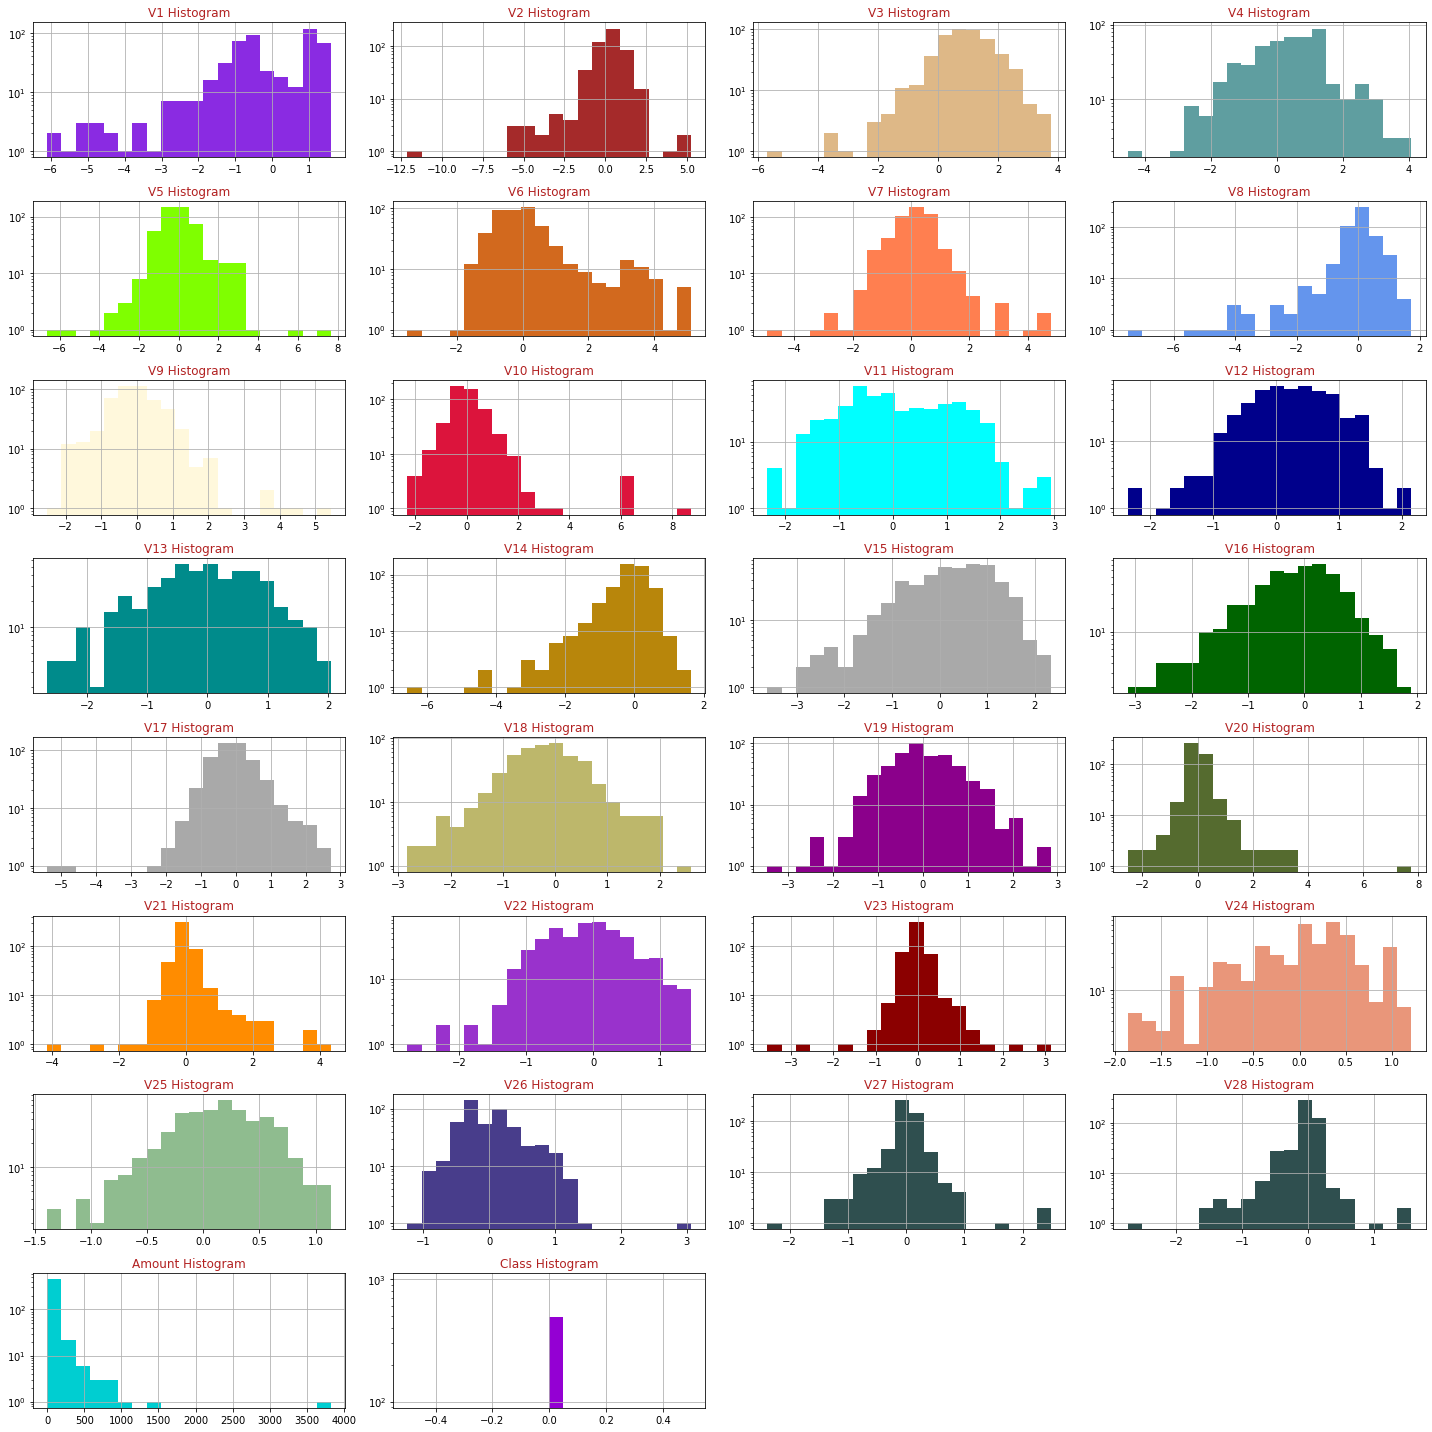

In [25]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

Correlation Plot

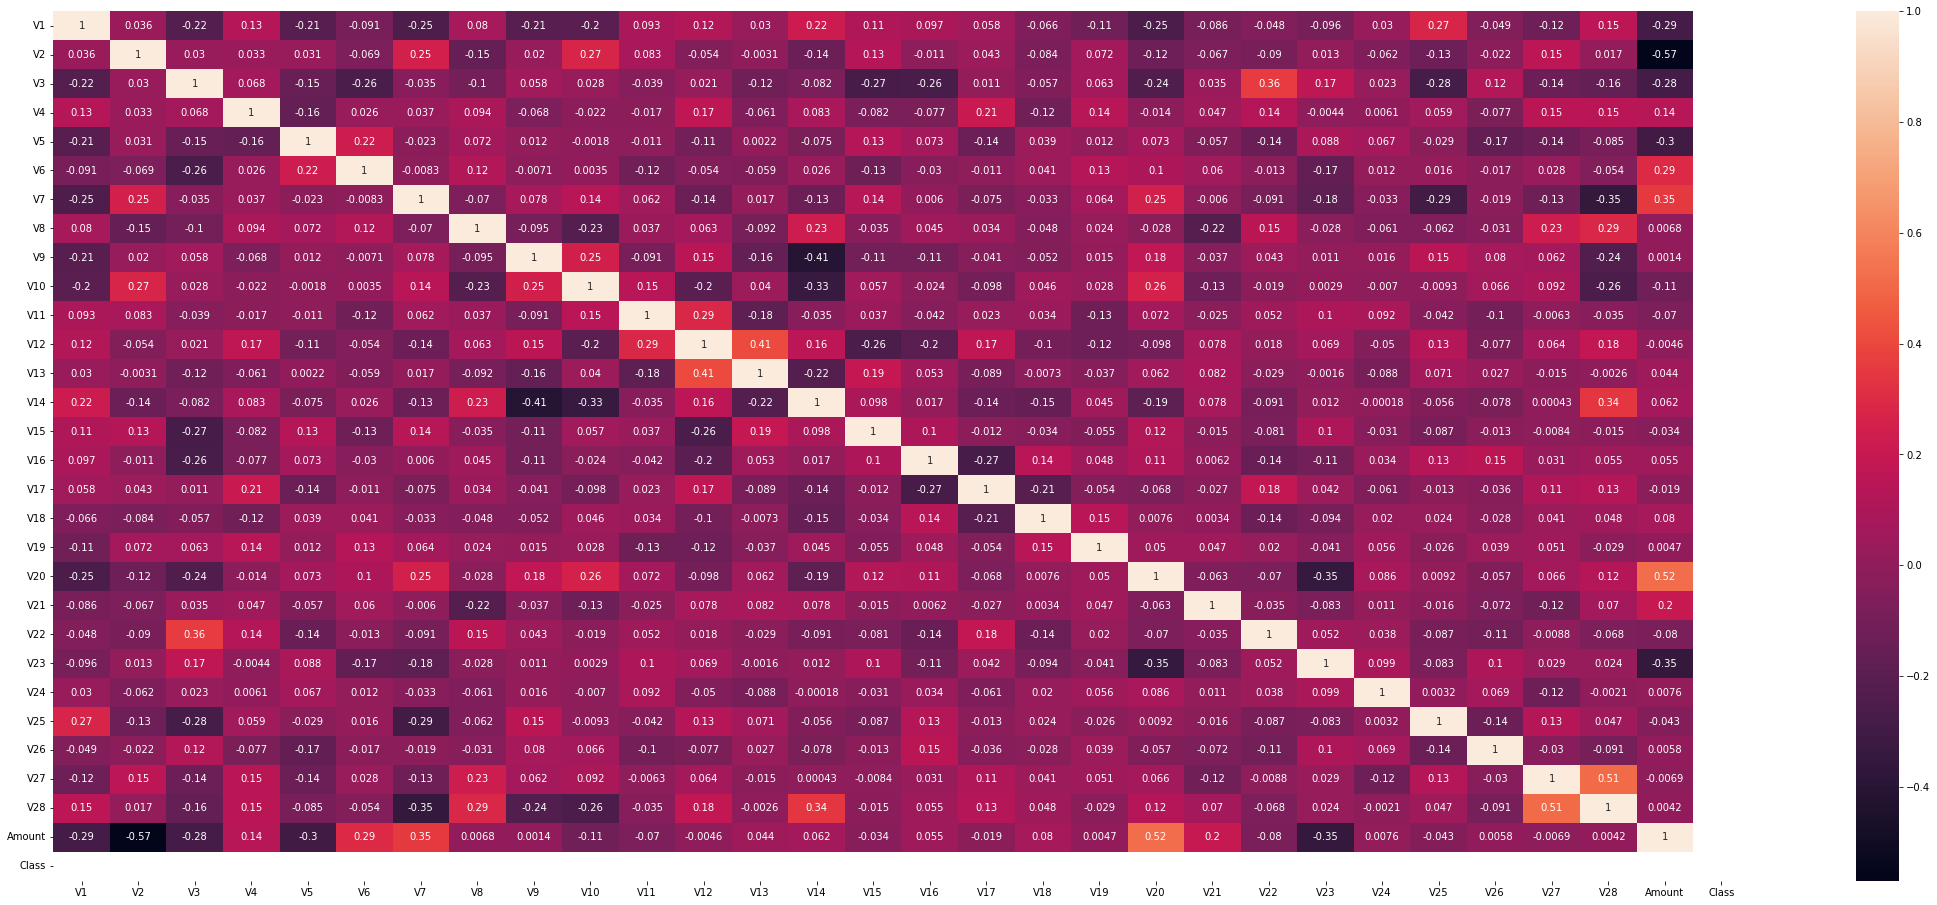

In [26]:
plt.figure(figsize=(38, 16))
sns.heatmap(df.corr(), annot=True)
plt.savefig('heatmap.png')
plt.show()

In [30]:
model = LogisticRegression()
model.fit(X, y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0